# Feature Import

In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pré-processamento dos Dados
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelos Utilizados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Otimização
from sklearn.model_selection import train_test_split, GridSearchCV

# Métricas de Avaliação: Classificação
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay

In [2]:
dfs = pd.read_excel("../data/dados.xlsx", sheet_name = None, index_col = "Empresa")
print("DataFrames disponíveis: ", list(dfs.keys())) # representam indicadores de anos antes da falência

n = int(input("\nSelecione dados de 1 a 5 anos pré-falência: "))

DataFrames disponíveis:  ['df_1y', 'df_2y', 'df_3y', 'df_4y', 'df_5y']

Selecione dados de 1 a 5 anos pré-falência: 1


In [3]:
df = dfs[list(dfs.keys())[n-1]]
df.head()

,Dispon/PC,Dispon/Receita Liq Operacional,Dispon/AC,Dispon/AT,AC/PC,AC/AT,PC/AT,PC/Receita Liq Operacional,Estoque/AT,Quick assets/AT,...,VA/IMOBILIZADO,VA/AT,VA/RLO,Contas a pagar/RLO,AC/RLO,Estoque/RLO,NOWC/RLO,Contas a receber/RLO,RLO/AT,Alvo
Empresa,,,,,,,,,,,,,,,,,,,,,
BOMBRIL,0.037400,0.022244,0.101842,0.029547,0.367232,0.290121,0.790021,0.594763,0.031404,0.258718,...,1.912136,0.573094,0.431451,0.095822,0.218416,0.023642,-0.112902,0.130422,1.328294,1
COSAN,1.644152,0.042668,0.535983,0.063081,3.067545,0.117692,0.038367,0.025951,0.012073,0.105619,...,-94.153913,-0.273755,-0.185168,0.004062,0.079607,0.008166,0.0563916,0.009919,1.478415,0
METALFRIO,0.714739,0.581478,0.562656,0.390647,1.270295,0.694291,0.546559,0.813553,0.154425,0.539866,...,-0.557492,-0.091249,-0.135825,0.192842,1.033452,0.229861,0.795228,0.176731,0.671817,0
TAESA,0.621887,0.963256,0.842059,0.172986,0.738532,0.205432,0.278163,1.548924,NaN,0.205432,...,64.438054,0.164443,0.915685,0.014210,1.143930,NaN,1.12769,0.178644,0.179584,0
TUPY,1.260625,0.444879,0.556159,0.265093,2.266661,0.476648,0.210287,0.352903,0.067499,0.409149,...,-0.199108,-0.066526,-0.111644,0.086110,0.799912,0.113277,0.613744,0.158185,0.595876,0


# Feature Engineering

In [4]:
df.dropna(inplace = True)

In [5]:
df["Alvo"].value_counts()

0    31
1    19
Name: Alvo, dtype: int64

In [6]:
X = df.drop("Alvo", axis = 1)
y = df["Alvo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

#### Padronização

In [7]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#### Análise de Componentes Principais (PCA)

In [8]:
pca = PCA()
X_train = pca.fit_transform(X_train_norm)
X_test = pca.transform(X_test_norm)

In [9]:
pca.explained_variance_ratio_.cumsum().round(2)

array([0.25, 0.4 , 0.52, 0.61, 0.69, 0.74, 0.8 , 0.83, 0.86, 0.89, 0.91,
       0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  ])

# Modelling

### Logistic Regression

In [10]:
modelo = LogisticRegression(max_iter = 1000, random_state = 42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<AxesSubplot:title={'center':'Probabilidades'}>

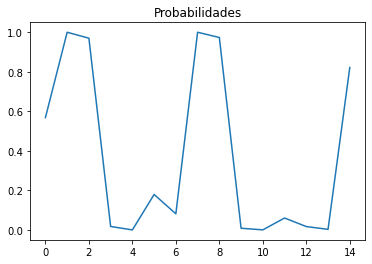

In [11]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba_train = modelo.predict_proba(X_train)[:,1]
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [12]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[21  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [13]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[7 3]
 [2 3]]

0.6666666666666666

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.50      0.60      0.55         5

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15



AUC - Teste : 0.6200000000000001


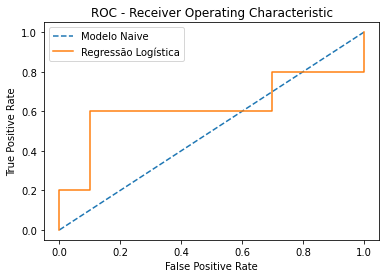

In [14]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Regressão Logística')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Random Forest

Hiperparâmetros a serem otimizados:

* n_estimators -> número de árvores distintas estimadas (padrão: 10 -> pode ser muito pequeno)
* max_features -> número máximo de variáveis independentes a ser considerado em cada nó das árvores de decisão (padrão: raiz quadrada da quantidade de variáveis independentes imputada ao modelo, o que é uma boa medida)

In [30]:
modelo = RandomForestClassifier(random_state = 42)

parametros = {'max_depth': [1, 5, None],
              'min_samples_leaf': [1, 3, 5],
              'min_samples_split': [2, 4],
              'n_estimators': [25, 50, 100],
              'criterion': ["gini", 'entropy']}

modelo = GridSearchCV(modelo, parametros, n_jobs = -1, cv = 2, scoring = "roc_auc")
modelo.fit(X_train, y_train)

print('Melhor conjunto de parâmetros:\n', melhor_modelo.best_params_)

Melhor conjunto de parâmetros:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}


<AxesSubplot:title={'center':'Probabilidades'}>

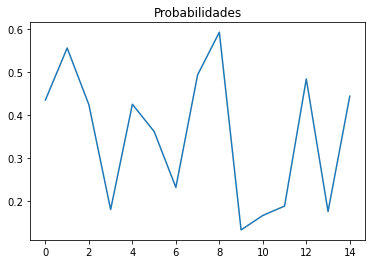

In [31]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [32]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[21  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [33]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[10  0]
 [ 3  2]]

0.8

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.70      0.72        15
weighted avg       0.85      0.80      0.77        15



AUC - Teste : 0.8599999999999999


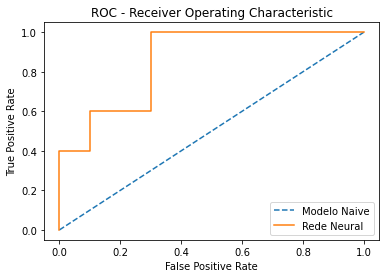

In [34]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Neural Network

Hiperparâmetros a serem otimizados:

* hidden_layer_sizes -> tupla contendo o número de neurônios dentro de cada camada (padrão: uma camada de 100 neurons)
* max_iter -> número máximo de iterações a serem realizadas pelo método de backpropagation
* alpha -> o valor máximo de alteração dos coeficientes em cada iteração, para minimizar a função de custo (padrão: 0.0001)
* solver -> Algoritmo utilizado para encontrar a solução ótima, cujo tempo de obtenção da resposta varia. Opções: 'lbfgs', 'sgd' e 'adam'.

In [25]:
modelo = MLPClassifier(max_iter = 100, random_state = 42)

parametros = {'hidden_layer_sizes': [(50,50), (50,100,50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam', "lbfgs"],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive']}

modelo = GridSearchCV(modelo, parametros, n_jobs = -1, cv = 2, scoring = "roc_auc")
modelo.fit(X_train, y_train)

print('Melhor conjunto de parâmetros:\n', melhor_modelo.best_params_)

Melhor conjunto de parâmetros:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}


C:\Users\brunomarcelino\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot:title={'center':'Probabilidades'}>

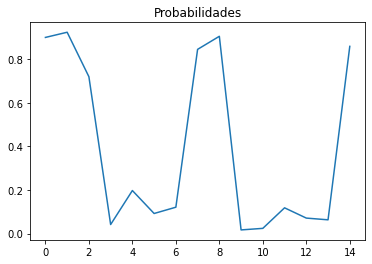

In [26]:
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)
y_pred_proba = modelo.predict_proba(X_test)[:,1]
pd.Series(y_pred_proba).plot(title = "Probabilidades")

In [27]:
# Treinamento
print(confusion_matrix(y_train, y_pred_train))
print()
print(accuracy_score(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

[[21  0]
 [ 0 14]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [28]:
# Teste
print(confusion_matrix(y_test, y_pred))
print()
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[7 3]
 [2 3]]

0.6666666666666666

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.50      0.60      0.55         5

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15



AUC - Teste : 0.76


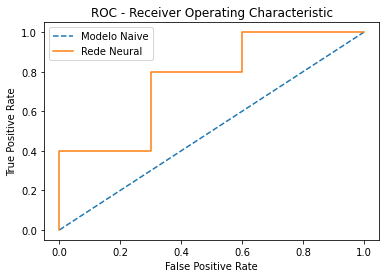

In [29]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Rede Neural')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

In [24]:
# Curva de Custo
pd.Series(modelo.loss_curve_).plot(title = "Loss Curve")

AttributeError: 'GridSearchCV' object has no attribute 'loss_curve_'